# Regresión Lineal

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import pyreadstat as pr

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [2]:
file = 'compensacion-ejecutivos.sav'
df, meta = pr.read_sav(file)

In [3]:
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [4]:
# Vamos a identificar la relación que existe entre el salario y el reto de variables
y = df['salario']
# gpa promedio acumulado en la carrera
X = df.drop(['salario', 'noasiat', 'postgrad'], axis = 1)
X

,gpa,experien
0,3.36,15.0
1,2.35,9.0
2,3.33,10.0
3,3.37,2.0
4,3.87,4.0
...,...,...
105,3.12,2.0
106,3.36,5.0
107,2.51,3.0
108,2.89,8.0


In [5]:
# OLS Ordinary Least Squares: Será la manera en la que optimicemos los parámetros de la función de Regresión Lineal.
# fit() 
reg_lin = sm.OLS(y, sm.add_constant(X)).fit()
print(reg_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Mon, 31 Aug 2020   Prob (F-statistic):           7.37e-38
Time:                        22:06:22   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.2

Dep. Variable:                salario -> Variable dependiente
Model:                            OLS -> Modelo utilizado (Ordinary List Squares)
R-squared: Es una medida de desempeño en este caso nos indica que nuestra regresión en nuestras variables X están explicando la variabilidad de Y en un 79%.
F-statistic: Se usa en generación de pruebas de hipotesis para medir la significancia de esta regresión que será apróximada a partir de este estadístico.
Prob (F-statistic): La probabilidad de que no rechacemos de que la significancia de esta regresión sea nula.

Nuestro interés principal son los coeficientes que corresponden a alpha y beta, donde alpha o a será la pendiente, en este caso por tener 2 variables explicativas (gpa y experien) estarán asociadas a las variables X definidas previamente. La constante en la tabla es dónde se cortan en el eje Y.

std err nos hace referencia al error asociado a los coeficientes, con estos 2, podemos construir una función t, sobre t probar la significancia de estos parámetros, en este caso, al probar la significancia de los parámetros tenemos una función o una hipótesis nula de que el parámetros es igual a cero, nos está indicando la probabilidad de que esta t o mejor, de que el error tipo I o probabilidad de rechazo, es muy cercana a 0.
```
  P>|t|
----------
  0.253
  0.000
  0.000
```
Por lo cual rechazaríamos esta hipotesis nula, y tendríamos que estadísticamente hablando el coeficiente asociado a gpa es diferente de cero, por lo que la variable es significativa y permite explicar a Y. 
```
   [0.025      0.975]
-----------------------
 -3606.328    1.35e+04
  1.75e+04    2.29e+04
  1678.730    2267.653
```
Estos son los intervalos de confianza para cada una de las variables que hemos definido. 

Por último se muestran una serie de pruebas que deben hacerse para chequear la estabilidad del modelo que hemos generado en particular los modelos de regresión deben chequear 3 cosas:
* Que el error se distribuya normal, para ello entonces, se genera una figura de los errores.

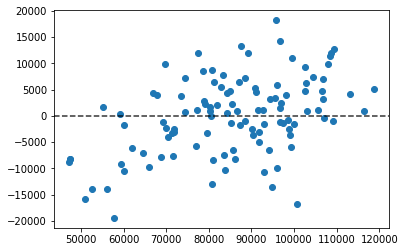

In [6]:
# Figura de los errores
fig, ax = plt.subplots()
y_pred = reg_lin.predict(sm.add_constant(X))
ax.scatter(y, y-y_pred)
plt.axhline(y=0, color='black', alpha = 0.8, linestyle='--')

# Como el diagrama de puntos no identifica ningún patrón, sino que son aleatorios, podemos decir que la muestra es aleatoria.

Otro chequeo importante que se debe hacer es que no haya multi-colinealidad entre los regresores o las variables X y esta se puede probar a través de la prueba Cond. No., y la prueba omnibus nos permite saber si las varianzas del modelo son iguales o están igualmente distribuidas, que es otro fuerte del modelo de regresión, lo que se conoce como elasticidad de la varianza.